<a href="https://colab.research.google.com/github/lytvyniuk/iowa_liquor_sales-Exploratory-Data-Analysis-/blob/master/Test_task_iowa_liquor_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# please run this cell and follow the link to authenticate
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

The dataset analysis can be useful to find out the best time to sell items, the most profitable vendors, the most popular drinks etc. This information eventually can help to understand businesses how to act to gain more revenue.

I start with general analysis of the data and go in details if I find an interesting observation.

**Top 10 stores with the most bottles sold**

Let's find out what vendors are the biggest on the market in terms of sold bottles. There are a lot of them, so I showed top 10 on the plot for better visualisation.

In [0]:
# select aggregated data on bottles_sold and vendors
%%bigquery --project protean-genius-271221 df
SELECT vendor_number, sum(bottles_sold)  as bottles_sold FROM `bigquery-public-data.iowa_liquor_sales.sales`  group by vendor_number order by bottles_sold desc limit 10

In [0]:
# select unique names of the stores , because some stores have same name code but slight difference in names (uppercase and lowercase etc), so it is needed to group correctly
%%bigquery --project protean-genius-271221 df_names
SELECT distinct vendor_number, vendor_name FROM `bigquery-public-data.iowa_liquor_sales.sales` 

In [28]:
# merging with names
df = pd.merge(df, df_names, on = "vendor_number", how='left').drop_duplicates(subset='vendor_number', keep="first")
df


,vendor_number,bottles_sold,vendor_name
0,260,29605348,DIAGEO AMERICAS
2,434,18779582,LUXCO INC
4,421,16395519,"Sazerac Co., Inc."
6,115,14648525,"Constellation Wine Company, Inc."
8,370,10300501,PERNOD RICARD USA
10,65,7567482,Jim Beam Brands
11,297,7419732,Laird & Company
13,300,6469489,McCormick Distilling Co.
15,259,6193042,Heaven Hill Brands
16,065,6117304,Jim Beam Brands


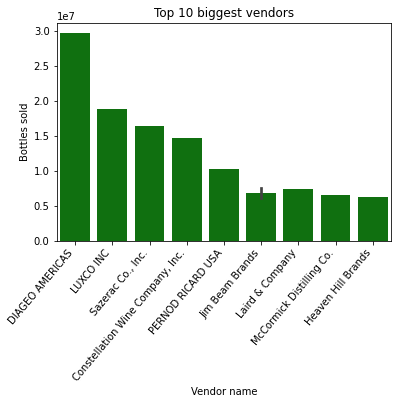

In [29]:
sns.barplot(x = 'vendor_name', y = 'bottles_sold',  data = df, color="green")
plt.xticks(rotation=50, horizontalalignment='right')
plt.xlabel("Vendor name")
plt.ylabel("Bottles sold")
plt.title("Top 10 biggest vendors")
plt.show()

**What is the most popular category of liquors in terms of bottles sold?**

In [0]:
%%bigquery --project protean-genius-271221 df
SELECT category,category_name, sum(bottles_sold) as bottles_sold FROM `bigquery-public-data.iowa_liquor_sales.sales`group by category,category_name order by bottles_sold desc limit 10

In [52]:
df

,category,category_name,bottles_sold
0,1031100,American Vodkas,18691485
1,1031080,VODKA 80 PROOF,18124615
2,1012100,CANADIAN WHISKIES,11123969
3,1012100,Canadian Whiskies,9922959
4,1062310,SPICED RUM,6633940
5,1081600,Whiskey Liqueur,6420596
6,1062400,Spiced Rum,5080127
7,1022100,TEQUILA,4079513
8,1011100,BLENDED WHISKIES,4073313
9,1011200,Straight Bourbon Whiskies,4040178


One category has same name (with different case) but different category code, which is strange. I leave it as it is, but if one of codes is wrong , 'Spiced Rum' would have a higher position.

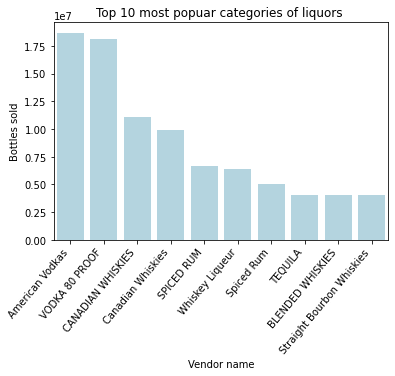

In [53]:
sns.barplot(x = 'category_name', y = 'bottles_sold',  data = df, color="lightblue")
plt.xticks(rotation=50, horizontalalignment='right')
plt.xlabel("Vendor name")
plt.ylabel("Bottles sold")
plt.title("Top 10 most popuar categories of liquors ")
plt.show()

Vodka is the most popular one, American vodkas category in particular.




 **Let's see how many drinks are sold in different days, monthes, years for all vendors.**

In [0]:
%%bigquery --project protean-genius-271221 df
SELECT sum(bottles_sold) as bottles_sold, FORMAT_DATE('%a',date) AS weekday FROM `bigquery-public-data.iowa_liquor_sales.sales` group by weekday

In [0]:
df_dates.dtypes

In [0]:
order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", 'Sun']
sns.barplot(x = 'weekday', y = 'bottles_sold',  data = df_dates, color="blue", order = order)
plt.xlabel('Day of the week')
plt.ylabel('Bottles sold')
plt.title("Number of bottles sold by day of the week")
plt.show()



Interesting observation that liquors almost were not sold on weekends, which is most likely caused by law restrictions. However, there is small amount of sales on Saturday. Amount of bottles on Mon - Thu is almost on the same level but it is suprisingly higher comparing to sales on Friday.

In [0]:
# let's see something from Saturday data, where sales are much lower
%%bigquery --project protean-genius-271221 df
select * from (SELECT vendor_number, sum(bottles_sold) as bottles_sold, FORMAT_DATE('%a',date) AS weekday FROM `bigquery-public-data.iowa_liquor_sales.sales`group by vendor_number, weekday) where weekday = 'Sat' order by bottles_sold desc limit 10

In [43]:
# merging with names
df = pd.merge(df, df_names, on = "vendor_number", how='left').drop_duplicates(subset='vendor_number', keep="first")
df

,vendor_number,bottles_sold,weekday,vendor_name
0,260,219641,Sat,DIAGEO AMERICAS
2,434,138562,Sat,LUXCO INC
4,421,130239,Sat,"Sazerac Co., Inc."
6,115,82380,Sat,"Constellation Wine Company, Inc."
8,370,64995,Sat,PERNOD RICARD USA
10,65,62483,Sat,Jim Beam Brands
11,259,58688,Sat,Heaven Hill Brands
12,297,57241,Sat,Laird & Company
14,300,44605,Sat,McCormick Distilling Co.
16,55,42730,Sat,Sazerac North America


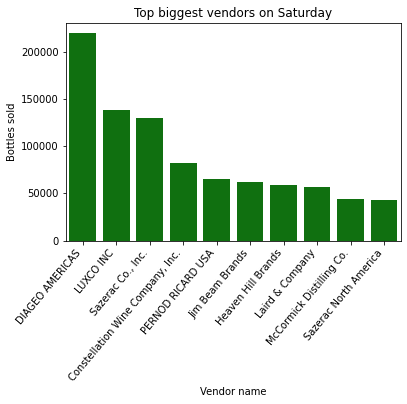

In [44]:
sns.barplot(x = 'vendor_name', y = 'bottles_sold',  data = df, color="green")
plt.xticks(rotation=50, horizontalalignment='right')
plt.xlabel("Vendor name")
plt.ylabel("Bottles sold")
plt.title("Top biggest vendors on Saturday")
plt.show()

Results are same as from whole dataset as expected.

Also we can find out the most popular drink type.

In [0]:
# find out most popular types of liquor Saturday data
%%bigquery --project protean-genius-271221 df
select * from (SELECT category,category_name, sum(bottles_sold) as bottles_sold, FORMAT_DATE('%a',date) AS weekday FROM `bigquery-public-data.iowa_liquor_sales.sales`group by category,category_name, weekday) where weekday = 'Sat' order by bottles_sold desc limit 10

In [46]:
df

,category,category_name,bottles_sold,weekday
0,1031080,VODKA 80 PROOF,133522,Sat
1,1031100,American Vodkas,122997,Sat
2,1012100,CANADIAN WHISKIES,98149,Sat
3,1081600,Whiskey Liqueur,67729,Sat
4,1012100,Canadian Whiskies,62215,Sat
5,1062310,SPICED RUM,59496,Sat
6,1081600,WHISKEY LIQUEUR,35495,Sat
7,1062400,Spiced Rum,33748,Sat
8,1011200,STRAIGHT BOURBON WHISKIES,33684,Sat
9,1011100,BLENDED WHISKIES,30611,Sat


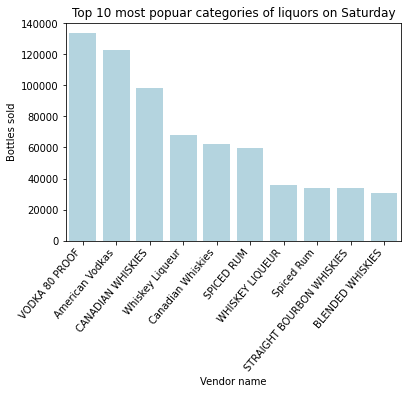

In [47]:
sns.barplot(x = 'category_name', y = 'bottles_sold',  data = df, color="lightblue")
plt.xticks(rotation=50, horizontalalignment='right')
plt.xlabel("Vendor name")
plt.ylabel("Bottles sold")
plt.title("Top 10 most popuar categories of liquors on Saturday")
plt.show()

Also more or less same result, but different category name is on top.

In [0]:
# group by month
%%bigquery --project protean-genius-271221 df_dates
SELECT sum(bottles_sold) as bottles_sold, FORMAT_DATE('%m',date) AS month FROM `bigquery-public-data.iowa_liquor_sales.sales` group by month order by month

In [55]:
df_dates

,bottles_sold,month
0,14584322,01
1,15090154,02
2,13768500,03
3,14604270,04
4,15826530,05
5,15829011,06
6,15024355,07
7,15378467,08
8,14202823,09
9,17936748,10


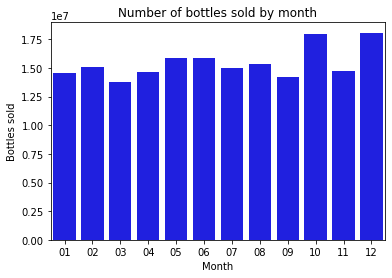

In [56]:
sns.barplot(x = 'month', y = 'bottles_sold',  data = df_dates, color="blue")
plt.xlabel('Month')
plt.ylabel('Bottles sold')
plt.title("Number of bottles sold by month")
plt.show()

The data shows that the busiest sales happen on October and December, which is surely related to upcoming holidays in these months (at least in December). Other months level of sales is lower without any significant differences.

In [0]:
# group by year
%%bigquery --project protean-genius-271221 df_dates
SELECT sum(bottles_sold) as bottles_sold, FORMAT_DATE('%Y',date) AS year FROM `bigquery-public-data.iowa_liquor_sales.sales` group by year order by year

In [58]:
df_dates

,bottles_sold,year
0,19917404,2012
1,19934692,2013
2,20666259,2014
3,21572443,2015
4,22670318,2016
5,23990017,2017
6,25435040,2018
7,26844339,2019
8,3996952,2020


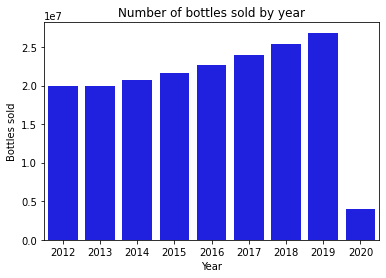

In [59]:
sns.barplot(x = 'year', y = 'bottles_sold',  data = df_dates, color="blue")
plt.xlabel('Year')
plt.ylabel('Bottles sold')
plt.title("Number of bottles sold by year")
plt.show()

[link text](https://)Sales are increasing every year ( for 2020 there is no full data yet).